In [6]:
#首先将不同年份的数据合并
import pandas as pd
pd.options.display.max_rows = 10
years =range(1880,2011,1)
columns =['name','sex','births']
pieces = []
for year in years:
    path = 'F:/babynames/yob%d.txt' % year
    frame = pd.read_csv(path,names = columns)
    frame['year'] = year
    pieces.append(frame)
names = pd.concat(pieces,ignore_index = True) #default : row-wise
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


sex         F        M
year                  
2006  1896468  2050234
2007  1916888  2069242
2008  1883645  2032310
2009  1827643  1973359
2010  1759010  1898382


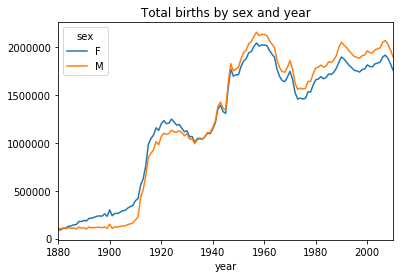

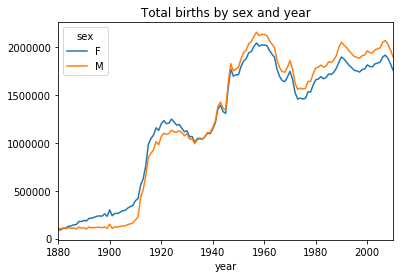

In [8]:
#计算每年，不同性别婴儿的出生数量
import matplotlib.pyplot as plt
#names.groupby(['sex','year']).sum()
total_births = names.pivot_table('births',index='year',columns='sex',aggfunc='sum')
print(total_births.tail())
total_births.plot(title='Total births by sex and year')
plt.show()

In [25]:
#计算每个名字的百分比： each name/total sum
#way 一
def add_prop(group):
    group['prop'] = group.births/group.births.sum()
    return group
names1 =names.groupby(['sex','year']).apply(add_prop)
#way 二
prop_series = names.groupby(['sex','year']).transform(lambda x:x/x.sum()) #返回的是一个dataframe
prop_series.rename(columns={'births':'prop'},inplace=True) #重命名名字
names2 = names.join(prop_series) #以Indexjoin二者
print(names1,names2)
#最好check以下prop是否正确
names1.groupby(['sex','year']).prop.sum()

              name sex  births  year      prop
0             Mary   F    7065  1880  0.077643
1             Anna   F    2604  1880  0.028618
2             Emma   F    2003  1880  0.022013
3        Elizabeth   F    1939  1880  0.021309
4           Minnie   F    1746  1880  0.019188
...            ...  ..     ...   ...       ...
1690779    Zymaire   M       5  2010  0.000003
1690780     Zyonne   M       5  2010  0.000003
1690781  Zyquarius   M       5  2010  0.000003
1690782      Zyran   M       5  2010  0.000003
1690783      Zzyzx   M       5  2010  0.000003

[1690784 rows x 5 columns]               name sex  births  year      prop
0             Mary   F    7065  1880  0.077643
1             Anna   F    2604  1880  0.028618
2             Emma   F    2003  1880  0.022013
3        Elizabeth   F    1939  1880  0.021309
4           Minnie   F    1746  1880  0.019188
...            ...  ..     ...   ...       ...
1690779    Zymaire   M       5  2010  0.000003
1690780     Zyonne   M       5  

sex  year
F    1880    1.0
     1881    1.0
     1882    1.0
     1883    1.0
     1884    1.0
            ... 
M    2006    1.0
     2007    1.0
     2008    1.0
     2009    1.0
     2010    1.0
Name: prop, dtype: float64

In [35]:
#获得每年各个性别data top1000
#way 一
def get_top1000(group):
    return group.sort_values(by='births',ascending = False)[:1000]
grouped = names1.groupby(['sex','year'])
top1000 = grouped.apply(get_top1000)#返回的是dataframe
top1000.reset_index(inplace=True,drop=True)#重新设置index

#way 二
pieces = []
for key,group in names1.groupby(['sex','year']):
    pieces.append(group.sort_values(by='births',ascending=False)[:1000])
top10001 = pd.concat(pieces,ignore_index = True)
top10001

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB
None


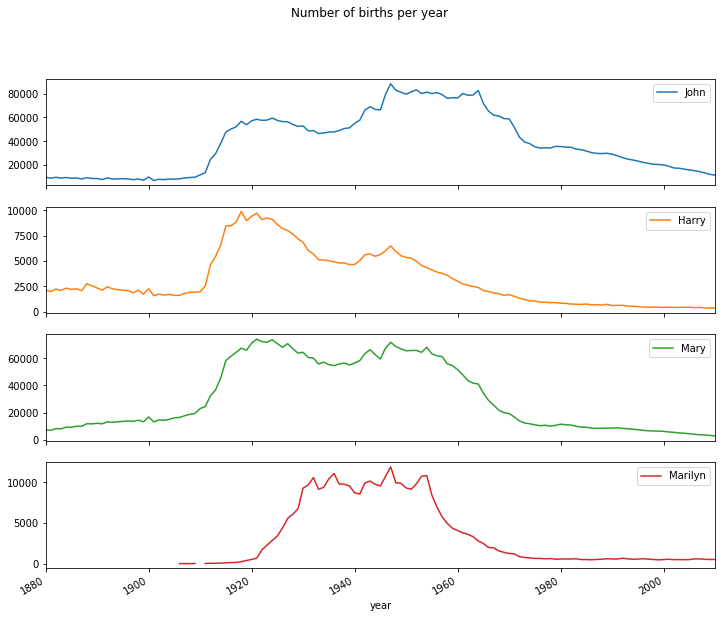

In [36]:
#下面用top1000数据，进行分析
#各个名字每年的出生数
boys = top1000[top1000.sex=='M']
girls = top1000[top1000.sex=='F']
#各个姓名每年的出生数
total_births = top1000.pivot_table('births',index='year',columns='name',aggfunc='sum')
print(total_births.info())
subset = total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True,figsize=(12,10),grid=False,title='Number of births per year')
plt.show()

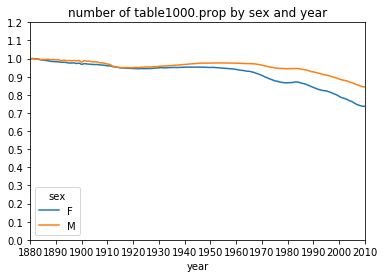

In [43]:
#检测姓名多样性的增加
#检测top1000各个名字每年所占百分比的变化情况
import numpy as np
table = top1000.pivot_table('prop',index ='year',columns='sex',aggfunc='sum')
table.plot(title='number of table1000.prop by sex and year',yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))
plt.show()

2010: 
 [116] 

1990: 
 [44]


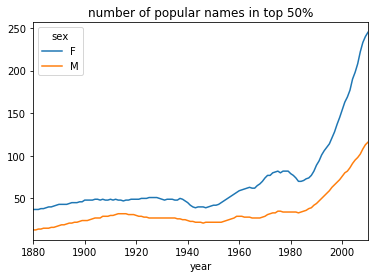

In [60]:
#计算50%数据量，姓名数量,以boy 2010数据为例
df = boys[boys.year == 2010]
prop_cumsum = df.sort_values(by='prop',ascending=False).prop.cumsum()
print('2010:','\n',prop_cumsum.searchsorted(0.5),'\n')#找到0.5在series prop_cumsum中的位置；116个名字的出生量即可达到当年总出生量的50%
df1 = boys[boys.year == 1990]
prop_cumsum1 = df1.sort_values(by='prop',ascending=False).prop.cumsum()
print('1990:','\n',prop_cumsum1.searchsorted(0.5))
#可以看出popular name的使用量逐年下降

#编写函数，查看每年popular name使用的变化情况
def get_quantile_count(group,q=0.5):
    prop_cumsum = group.sort_values(by='prop',ascending=False).prop.cumsum()
    return prop_cumsum.values.searchsorted(0.5) #
diversity = top1000.groupby(['sex','year']).apply(get_quantile_count) #返回series
diversity1 = diversity.unstack('sex')
diversity1.plot(title='number of popular names in top 50%')
plt.show()


comparsion: 
 0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: name, dtype: object 
 0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: name, dtype: object 
 <class 'pandas.core.series.Series'>
sex                 F                          M                 
year             1910      1960      2010   1910    1960     2010
last_letter                                                      
a            108376.0  691247.0  670605.0  977.0  5204.0  28438.0
b                 NaN     694.0     450.0  411.0  3912.0  38859.0
sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64


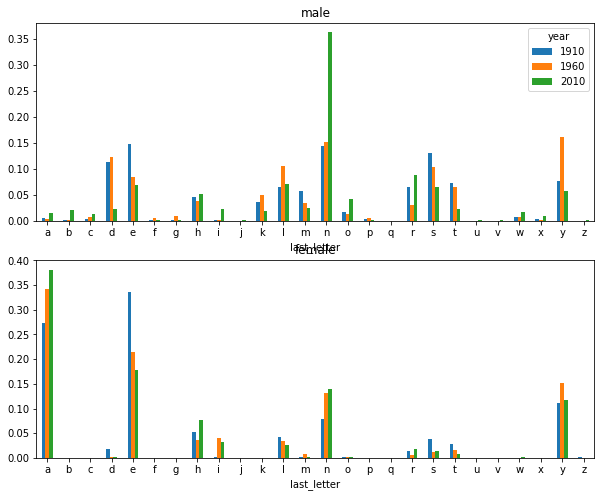

In [74]:
#每年各个性别下不同last character出现的频次
get_last_letter = lambda x : x[-1]
last_letters = names.name.apply(get_last_letter)
last_letters1 = names.name.map(get_last_letter)
print("comparsion:",'\n',last_letters,'\n',last_letters1,'\n',type(last_letters))
last_letters.name = 'last_letter'
table = names.pivot_table('births',index=last_letters,columns=['sex','year'],aggfunc='sum') 
subtable = table.reindex(columns=[1910,1960,2010],level='year')
print(subtable.head(2))
print(subtable.sum(axis=0))
letter_prop = subtable/subtable.sum()
fig,axes = plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='female',legend=False)
plt.show()

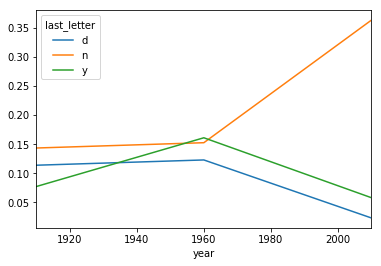

In [77]:
#查看male中不同尾字母数量随year的变化情况
dny_ts = letter_prop.loc[['d','n','y'],'M'].T
dny_ts.plot()
plt.show()

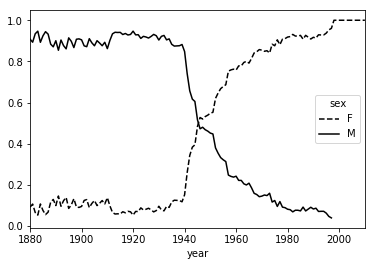

In [92]:
#查看男生名字变为女生名字的情况
all_names = pd.Series(names.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
#将top1000中lesley_like的名字过滤出来
filtered = top1000[top1000.name.isin(lesley_like)]
table= filtered.pivot_table('births',index='year',columns='sex',aggfunc='sum')#每年不同性别lesley_like名字的总量
table1 = table.div(table.sum(axis=1),axis=0)
#table/table.sum(1)错误的写法，只有index和columns相同时，才能想除
table1.plot(style={'M':'k-','F':'k--'})
plt.show()